<a href="https://colab.research.google.com/github/nc9107/Machine-Learning/blob/main/Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mumbai_data = pd.read_csv('Mumbai.csv')
hyd_data = pd.read_csv('Hyderabad.csv')
chennai_data = pd.read_csv('Chennai.csv')
delhi_data = pd.read_csv('Delhi.csv')



NameError: ignored

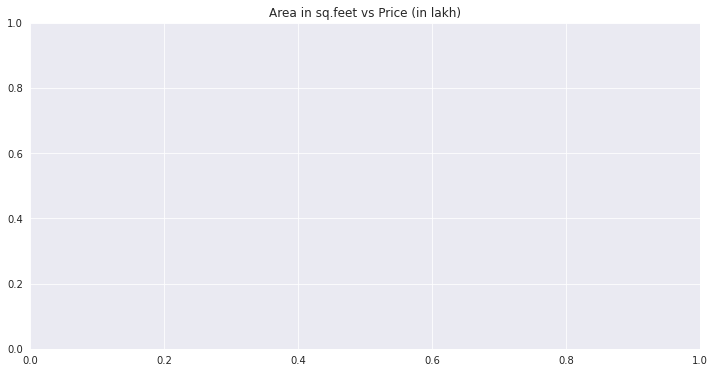

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Area in sq.feet vs Price (in Dollars)')
sns.scatterplot(x=mumbai_data['Price'],y=mumbai_data['Area'],hue=mumbai_data['No. of Bedrooms'])

In [ ]:
# Cleaning data for amenities. 

# mumbai_data['24X7Security'].replace({9:1}, inplace=True)
# mumbai_data['MaintenanceStaff'].replace({9:1}, inplace=True)
# mumbai_data['Gymnasium'].replace({9:1}, inplace=True)
# mumbai_data['SwimmingPool'].replace({9:1}, inplace=True)
# mumbai_data['School'].replace({9:1}, inplace=True)
# mumbai_data['Hospital'].replace({9:1}, inplace=True)

mumbai_data['24X7Security'] = mumbai_data[mumbai_data['24X7Security'] != 9]

print(mumbai_data[mumbai_data['Location'] == 'Vasind'])

def cvt_currency(x):
    return 0.014 * x

mumbai_data['Price'] = mumbai_data['Price'].apply(cvt_currency)
hyd_data['Price'] = hyd_data['Price'].apply(cvt_currency)
chennai_data['Price'] = delhi_data['Price'].apply(cvt_currency)
delhi_data['Price'] = delhi_data['Price'].apply(cvt_currency)



        Price  Area Location  ...  Sofa  Wardrobe  Refrigerator
1316  2000000   540   Vasind  ...     0         0             0

[1 rows x 40 columns]


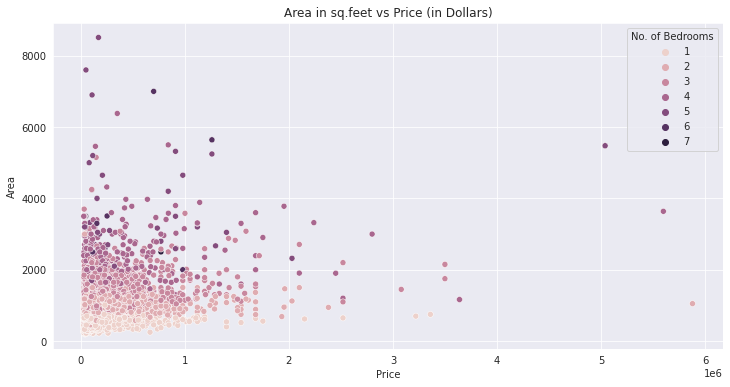

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Area in sq.feet vs Price (in Dollars)')
sns.scatterplot(x=mumbai_data['Price'],y=mumbai_data['Area'],hue=mumbai_data['No. of Bedrooms'])

In [ ]:
print(mumbai_data.describe())

              Price         Area  ...     Wardrobe  Refrigerator
count  7.719000e+03  7719.000000  ...  7719.000000   7719.000000
mean   2.108631e+05   998.409250  ...     7.383988      7.374789
std    2.872940e+05   550.967809  ...     3.438345      3.456702
min    2.800000e+04   200.000000  ...     0.000000      0.000000
25%    7.420000e+04   650.000000  ...     9.000000      9.000000
50%    1.330000e+05   900.000000  ...     9.000000      9.000000
75%    2.380000e+05  1177.000000  ...     9.000000      9.000000
max    5.880000e+06  8511.000000  ...     9.000000      9.000000

[8 rows x 38 columns]


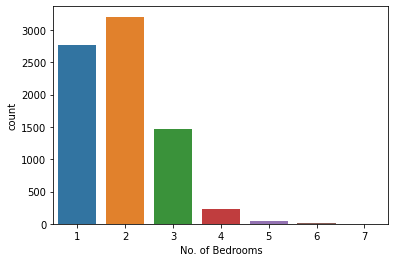

In [ ]:
# Frequencies of Important Variables. 
# 1) No. of Bedrooms types in Mumbai 
sns.countplot(data=mumbai_data, x='No. of Bedrooms')
plt.show()

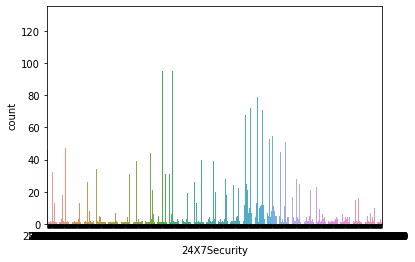

In [ ]:
# sns.countplot(data=mumbai_data, x='24X7Security')
# plt.show()

1063
93


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


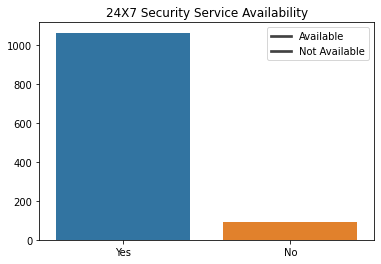

In [ ]:
#2) Presence of 24*7 Security
# Important especially in a meterpolitan area. 
yes_count = len(mumbai_data[mumbai_data['24X7Security'] == 1].value_counts())
print(yes_count)
# yes_count = mumbai_data[mumbai_data['24X7Security'] == 1]
# print(yes_count)
no_count = len(mumbai_data[mumbai_data['24X7Security'] == 0].value_counts())
print(no_count)

sns.barplot(['Yes', 'No'], [yes_count, no_count])
plt.title('24X7 Security Service Availability')
plt.legend(['Available', 'Not Available'])
plt.show()


# sns.countplot(data=mumbai_data, x='24X7Security')
# plt.show()

7719


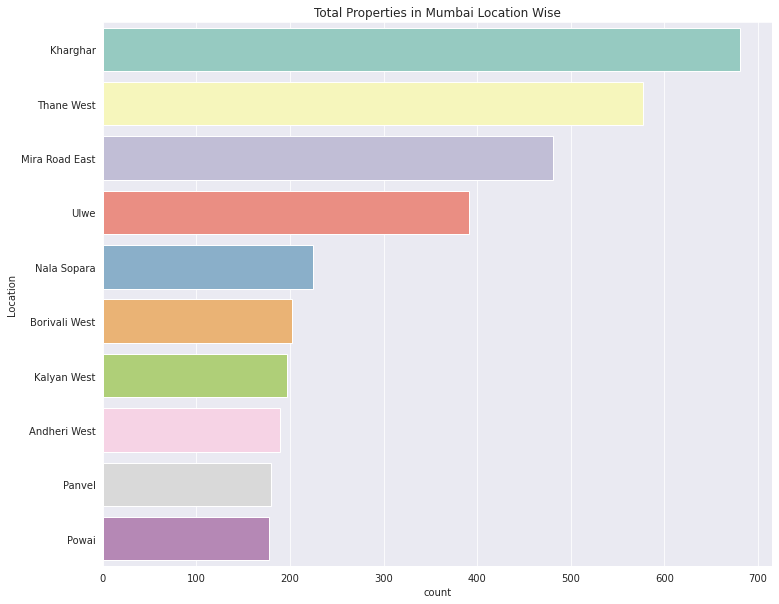

In [ ]:
# Location wise Analysis in Mumbai 
plt.figure(figsize=(12,10))
print(len(mumbai_data))
plt.title('Total Properties in Mumbai Location Wise')
sns.countplot(y='Location',data=mumbai_data,order= mumbai_data.Location.value_counts().index[:10],palette = "Set3")

In [ ]:
# Location Prominence for top 10 locations. 
expensive_locations = mumbai_data.groupby(by='Location').Price.mean().sort_values(ascending=False)[:10]
print(expensive_locations)

cheapest_locations = mumbai_data.groupby(by='Location').Price.mean().sort_values()[:10]
print(cheapest_locations)

# # sns.countplot(data=top_locations, x='Location')
# sns.barplot(x='Location', y=top_locations)
# plt.show()

Location
MG Road           5.880000e+06
Agripada          3.640000e+06
juhu tara         2.520000e+06
Hanuman Nagar     2.170000e+06
worli sea face    2.100000e+06
Haji Ali          1.960000e+06
Morya Nagar       1.915200e+06
Lower Parel       1.821144e+06
Mahalaxmi         1.589000e+06
Tardeo            1.547000e+06
Name: Price, dtype: float64
Location
Vasind               28000.0
Asangaon             28490.0
ulhasnagar 4         28700.0
Sector-26 Taloja     29400.0
Gundavali Gaothan    30296.0
Sector16 Ulwe        32200.0
Syndicate            32200.0
Karjat               32877.6
Chedda Nagar         33600.0
Ambarnath            35378.0
Name: Price, dtype: float64


Relationships:


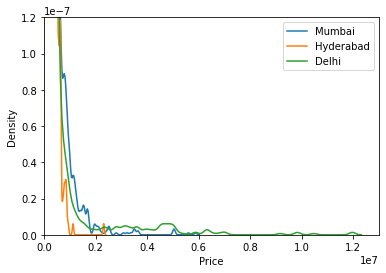

In [ ]:
# Price Distribution

sns.kdeplot(x=mumbai_data['Price'], )
sns.kdeplot(x=hyd_data['Price'],legend=True)
sns.kdeplot(x=delhi_data['Price'], legend=True)


plt.axis([0, 1.3e7, 0, 1.2e-7])

plt.legend(['Mumbai', 'Hyderabad', 'Delhi'])
plt.show()


In [ ]:
# Plotting Price Comparison Resale Vs New 

resale_df = mumbai_data[mumbai_data['Resale'] == 1]

print(resale_df['Price'])

resale_mean = resale_df['Price'].mean()
print(resale_mean)

# new_apt_df = mumbai_data[mumbai_data['Resale'] == 0]

# new_apt_mean = new_apt_df['Price'].mean()
# sns.set_style("darkgrid")
# sns.barplot(['Resale Mean', 'New Apt Price Mean'], [resale_mean, new_apt_mean])
# plt.title('Price Averages for New Vs. Resale Aprtments')
# plt.xlabel('Apartment Category')
# sns.color_palette(palette="bright")
# plt.ylabel('Price')
# plt.show()



0        67900.0
1        63000.0
2        93800.0
3        63000.0
4        70000.0
          ...   
7708    151200.0
7709     36400.0
7711    100800.0
7712     98000.0
7715    203000.0
Name: Price, Length: 4995, dtype: float64
200999.8356284279


     Price  No. of Bedrooms
0  67900.0                1
1  63000.0                1
2  93800.0                1
3  63000.0                1
4  70000.0                1


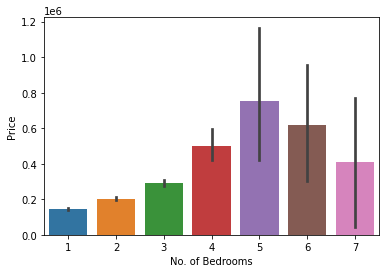

In [ ]:
# No. of bedrooms Vs Price 
hue = resale, new 
x = loc
 y = price

bed_vs_price = mumbai_data[['Price', 'No. of Bedrooms' ]]

print(bed_vs_price.head(5))

# sns.scatterplot(data=bed_vs_price, y='Price', x='No. of Bedrooms', estimator=len)

# sns.lineplot(data=bed_vs_price, x='Price', y='No. of Bedrooms', estimator=len)

sns.barplot(data=bed_vs_price, x='No. of Bedrooms', y='Price')

plt.show()

In [ ]:
# hue = resale, new 
# x = loc
#  y = price



In [ ]:
print(mumbai_data[mumbai_data['No. of Bedrooms'] == 7].head())

         Price  Area     Location  ...  Sofa  Wardrobe  Refrigerator
1969  770000.0  2500     Sea Face  ...     9         9             9
1977   46200.0  3500  Upper Worli  ...     9         9             9

[2 rows x 40 columns]
